## **STEP 1: INSTALL NECESSARY PACKAGES**

In [ ]:
%pip install scikit-learn
%pip install seaborn
%pip install pandas
%pip install matplotlib

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
# also set a random state
rs = 123

## **STEP 2: LOAD USER PROFILE DATA SET**


In [ ]:
# Importing the pandas library, which is commonly used for data manipulation and analysis
import pandas as pd

# Defining the URL of the CSV file containing user profiles
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"

# Using pandas' read_csv function to read the CSV file from the specified URL into a DataFrame
user_profile_df = pd.read_csv(user_profile_url)

# Displaying the first few rows of the DataFrame to inspect its contents
user_profile_df.head()


,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
import os

# Define the URL of the file to download
file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv'

# Use the wget command to download the file
!wget {file_url}

# Alternatively, you can use the curl command
# !curl {file_url} -o 'user_profile.csv'

# Check if the file is downloaded and list files
if os.path.exists('user_profile.csv'):
    print('File downloaded successfully!')
else:
    print('File not found. Check the download link or command.')

# List files in the current directory to confirm
!ls


--2024-04-20 15:58:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2184029 (2.1M) [text/csv]
Saving to: ‘user_profile.csv.1’

user_profile.csv.1  100%[===================>]   2.08M   166KB/s    in 8.1s    

2024-04-20 15:58:20 (265 KB/s) - ‘user_profile.csv.1’ saved [2184029/2184029]

File downloaded successfully!
sample_data  user_profile.csv  user_profile.csv.1


In [ ]:
user_profile_df.shape

(33901, 15)

In [ ]:
feature_names = list(user_profile_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

In [ ]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


In [ ]:
# Use StandardScaler to make each feature with mean 0, standard deviation 1
# Instantiating a StandardScaler object
scaler = StandardScaler()

# Standardizing the selected features (feature_names) in the user_profile_df DataFrame
user_profile_df[feature_names] = scaler.fit_transform(user_profile_df[feature_names])

# Printing the mean and standard deviation of the standardized features
print("mean {} and standard deviation{} ".format(user_profile_df[feature_names].mean(), user_profile_df[feature_names].std()))

mean Database          -3.353495e-17
Python            -5.700942e-17
CloudComputing    -3.521170e-17
DataAnalysis      -7.671120e-17
Containers         3.353495e-18
MachineLearning    3.688845e-17
ComputerVision    -1.509073e-17
DataScience       -1.676748e-17
BigData            6.706990e-17
Chatbot           -6.874665e-17
R                  4.233788e-17
BackendDev         1.383317e-17
FrontendDev        5.051202e-17
Blockchain        -5.281755e-17
dtype: float64 and standard deviationDatabase           1.000015
Python             1.000015
CloudComputing     1.000015
DataAnalysis       1.000015
Containers         1.000015
MachineLearning    1.000015
ComputerVision     1.000015
DataScience        1.000015
BigData            1.000015
Chatbot            1.000015
R                  1.000015
BackendDev         1.000015
FrontendDev        1.000015
Blockchain         1.000015
dtype: float64 


In [ ]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.064064e+06,-3.353495e-17,-5.700942e-17,-3.521170e-17,-7.671120e-17,3.353495e-18,3.688845e-17,-1.509073e-17,-1.676748e-17,6.706990e-17,-6.874665e-17,4.233788e-17,1.383317e-17,5.051202e-17,-5.281755e-17
std,4.972578e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,6.813480e+05,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,1.043907e+06,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,1.451159e+06,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.103039e+06,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


In [ ]:
features = user_profile_df.loc[:, user_profile_df.columns != 'user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


In [ ]:
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


### TASK: Perform K-means clustering algorithm on the user profile feature vectors


_TODO: grid search the optimized n_cluster for KMeans() model_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

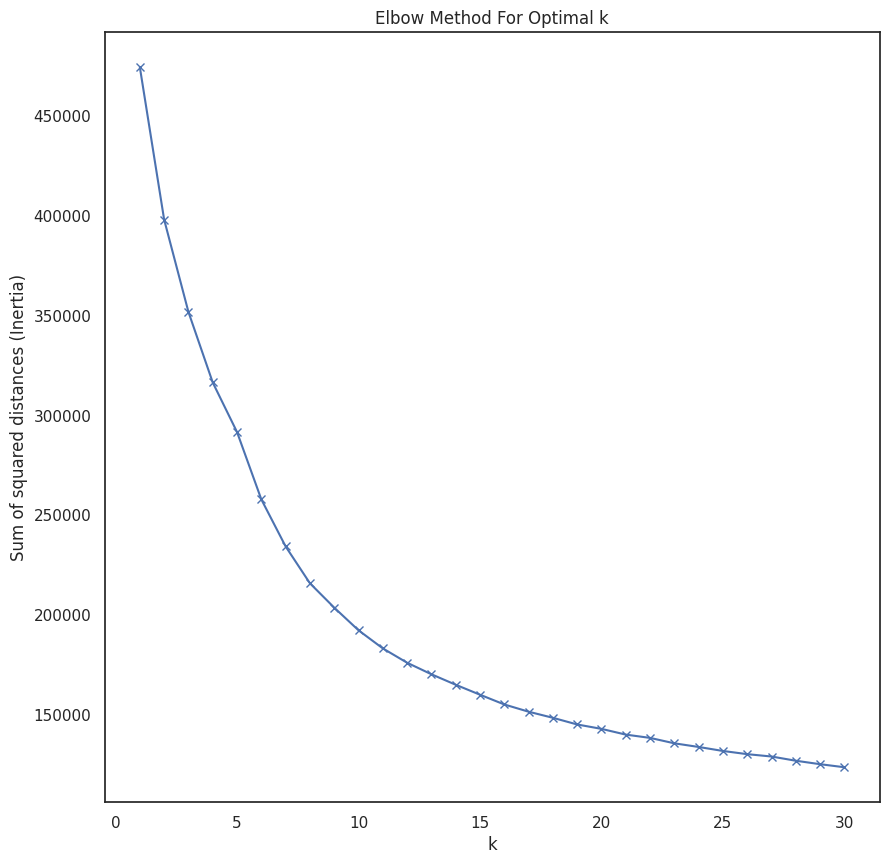

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_kmeans_and_plot_inertia(data, max_clusters, random_state = rs):
    sum_of_squared_distances = []
    K = range(1, max_clusters + 1)

    for k in K:
        kmeans_model = KMeans(n_clusters=k, random_state=random_state).fit(data)
        sum_of_squared_distances.append(kmeans_model.inertia_)

    # Adjust the plot size here
    plt.figure(figsize=(10, 10))  # Setting width and height to the same value
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances (Inertia)')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# Call the function with your normalized data and a random state of your choice
calculate_kmeans_and_plot_inertia(features, max_clusters=30, random_state=42)


In [ ]:
cluster_labels = [None] * len(user_ids)

In [ ]:
# Assuming 'normalized_features' is your preprocessed and normalized data
n_clusters = 20  # This is the optimized number of clusters

# Initialize the KMeans model
kmeans_model = KMeans(n_clusters=n_clusters, random_state=rs)
kmeans_model.fit(features)  # Fit the model on your normalized data

# Get the output cluster labels from the model
cluster_labels = kmeans_model.labels_

# Now, cluster_labels will hold the cluster labels for each user


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def combine_cluster_labels(user_ids, labels):
    # Convert labels to a DataFrame
    labels_df = pd.DataFrame(labels)
    # Merge user_ids DataFrame with labels DataFrame based on index
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    # Rename columns to 'user' and 'cluster'
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

In [ ]:
result_df = combine_cluster_labels(user_ids, cluster_labels)
result_df  # This line will display the DataFrame in a cell in Google Colab

,user,cluster
0,2,18
1,4,17
2,5,18
3,7,6
4,8,6
...,...,...
33896,2102054,12
33897,2102356,6
33898,2102680,2
33899,2102983,6


### TASK: Apply PCA on user profile feature vectors to reduce dimensions


In [ ]:
# Extracting features from the user_profile_df DataFrame, excluding the 'user' column
features = user_profile_df.loc[:, user_profile_df.columns != 'user']

# Extracting user IDs from the user_profile_df DataFrame
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']

# Creating a list of feature names by excluding the 'user' column name
feature_names = list(user_profile_df.columns[1:])

In [ ]:
print(f"There are {len(feature_names)} features for each user profile.")

There are 14 features for each user profile.


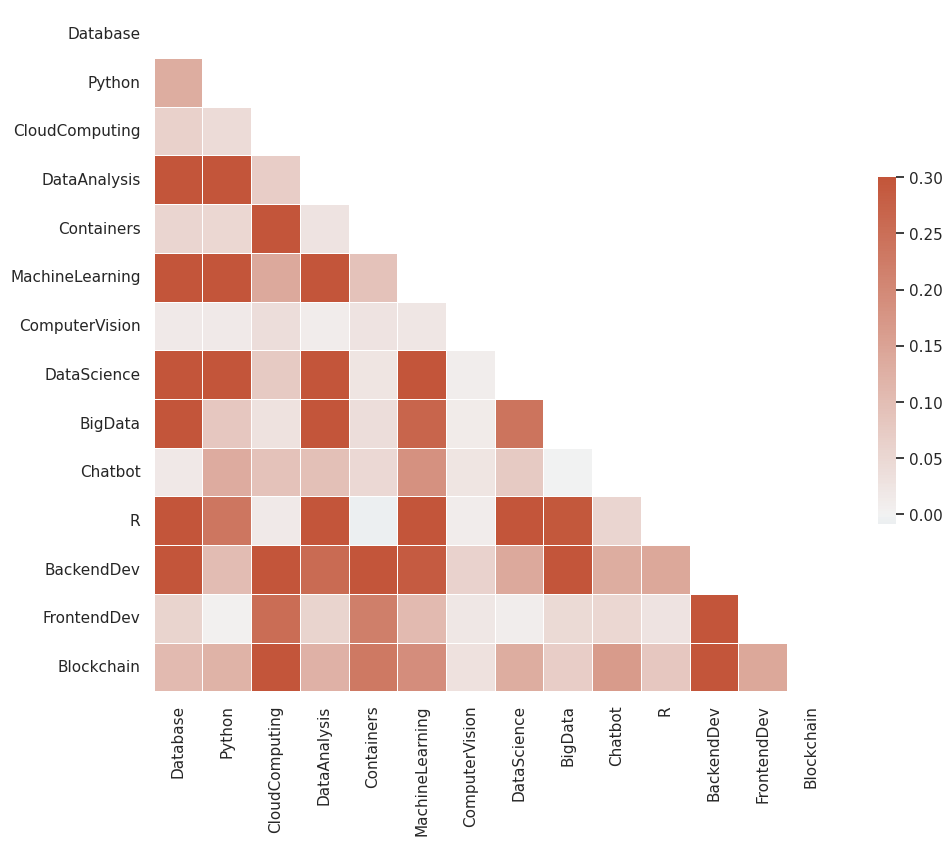

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = features.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()

_TODO: Find the optimized `n_components` for PCA_


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming user_profile_df is your DataFrame and it includes a 'user' column that we want to exclude from PCA
features = user_profile_df.loc[:, user_profile_df.columns != 'user']

# This function finds the optimal number of components that explain at least 90% of variance
def find_optimal_components(features, max_components=14, variance_threshold=0.9):
    for n_components in range(1, max_components + 1):
        pca = PCA(n_components=n_components)
        transformed_features = pca.fit_transform(features)
        accumulated_variance_ratio = sum(pca.explained_variance_ratio_)

        # Check if the accumulated variance ratio is greater than or equal to the threshold
        if accumulated_variance_ratio >= variance_threshold:
            return n_components

    return max_components  # If no n_components under the threshold, return the max as a fallback

# Call the function and print the result
optimal_components = find_optimal_components(features)
print("Optimal number of components:", optimal_components)


Optimal number of components: 9


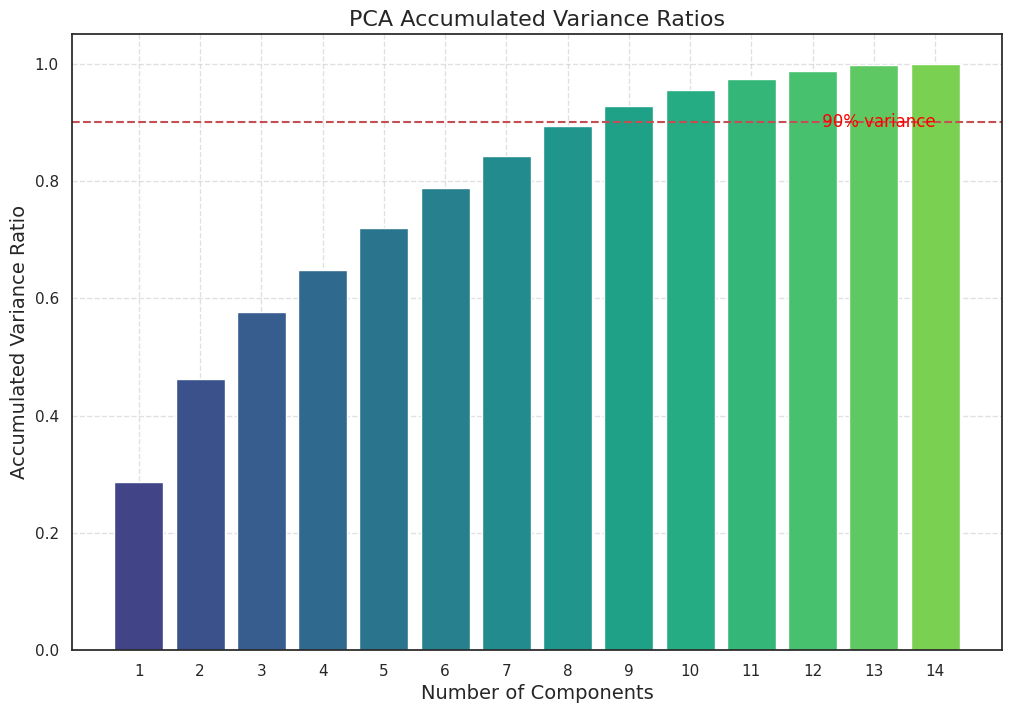

Optimal number of components: 9


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Assuming user_profile_df is your DataFrame and it includes a 'user' column that we want to exclude from PCA
features = user_profile_df.loc[:, user_profile_df.columns != 'user']

def plot_pca_variance(features, max_components=14):
    variance_ratios = []
    components_range = range(1, max_components + 1)

    for n_components in components_range:
        pca = PCA(n_components=n_components)
        transformed_features = pca.fit_transform(features)
        accumulated_variance_ratio = sum(pca.explained_variance_ratio_)
        variance_ratios.append(accumulated_variance_ratio)

    # Plotting the results using a bar chart
    plt.figure(figsize=(12, 8))
    plt.bar(components_range, variance_ratios, color=plt.cm.viridis(np.linspace(0.2, 0.8, max_components)))
    plt.title('PCA Accumulated Variance Ratios', fontsize=16)
    plt.xlabel('Number of Components', fontsize=14)
    plt.ylabel('Accumulated Variance Ratio', fontsize=14)
    plt.axhline(y=0.9, color='r', linestyle='--')
    plt.text(max_components, 0.9, ' 90% variance', va='center', ha='right', color='red', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(components_range)  # Ensure all component numbers are labeled
    plt.show()

    # Return the smallest number of components that explain at least 90% of the variance
    for i, ratio in enumerate(variance_ratios):
        if ratio >= 0.9:
            return i + 1  # plus one because index starts at 0 but components count starts at 1

    return max_components  # If no components meet the threshold, return the maximum as a fallback

# Call the function and display the optimal number of components
optimal_components = plot_pca_variance(features)
print("Optimal number of components:", optimal_components)


_TODO: Perform PCA to transform original user profile features_


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Assume user_profile_df is your DataFrame and it includes a 'user' column that we want to exclude from PCA
features = user_profile_df.loc[:, user_profile_df.columns != 'user']
user_ids = user_profile_df['user']  # Save user IDs to merge later

def find_optimal_components(features, variance_threshold=0.9):
    for n_components in range(1, 15):
        pca = PCA(n_components=n_components)
        pca.fit(features)
        cumulative_variance = sum(pca.explained_variance_ratio_)
        if cumulative_variance >= variance_threshold:
            return n_components, pca, cumulative_variance
    return 14, pca, cumulative_variance  # Fallback to max if threshold is never met

# Find the optimal number of components
optimal_n, fitted_pca, final_cumulative_variance = find_optimal_components(features)

# Transform the features using the optimal number of components determined
reduced_features = fitted_pca.transform(features)

# Convert the reduced features into a DataFrame
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'PC{i}' for i in range(optimal_n)])

# Merge the user IDs with the transformed features
reduced_features_df['user'] = user_ids
reduced_features_df = reduced_features_df[['user'] + [f'PC{i}' for i in range(optimal_n)]]

# Adjust display settings for maximum width
pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
pd.set_option('display.expand_frame_repr', False)  # Prevents wrapping of DataFrame to next line

# Display the DataFrame and some additional info
print("Optimal number of PCA components:", optimal_n)
print("First 5 instances:")
print(reduced_features_df.head())  # Display the first 5 instances
print("Last 5 instances:")
print(reduced_features_df.tail())  # Display the last 5 instances

# Display the cumulative variance explained by the optimal number of components
print("Cumulative variance explained by the optimal components:", final_cumulative_variance)


Optimal number of PCA components: 9
First 5 instances:
   user        PC0       PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
0     2  17.772494  0.200681  1.730609  2.567359 -3.825814  2.707154  0.681042  2.312613  0.868272
1     4   7.145199 -2.847481  2.358636 -0.576654  0.398803 -0.134533  0.549769  0.469033  0.033405
2     5  11.363270  1.873619 -1.522077  1.076144 -1.711688  0.883212  1.677582  2.937669  2.097639
3     7  -1.834033 -0.277462  0.564905  0.053470 -0.064440  0.165757  0.030956  0.039519  0.210887
4     8  -1.049125 -0.684767  1.072765  0.006371 -0.005695  0.118686  0.118559  0.559292  0.186379
Last 5 instances:
          user       PC0       PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
33896  2102054  0.633824  0.108815 -0.388871 -0.122665 -0.098364  0.358333  1.752049  1.486542 -0.523600
33897  2102356 -2.095339  0.135058  0.244727 -0.088185  0.025081  0.183641  0.046413  0.191709  0.260437
33898  2102680  0.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_3/images/pca_res.png)


### TASK: Perform k-means clustering on the PCA transformed feature vectors


In [ ]:
# Assume reduced_features_df is the DataFrame from the previous PCA application,
# and it includes both the user IDs and the PCA components.

# Select the number of clusters you wish to use, which might be based on prior analysis
# or domain knowledge. You could also use an elbow method or similar to find this number.
n_clusters = 20  # Example number of clusters

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=rs)

# Fit KMeans model on the PCA-reduced features, excluding the 'user' column
kmeans.fit(reduced_features_df.drop('user', axis=1))

# Obtain the cluster labels
cluster_labels = kmeans.labels_

# Assign each user a cluster label
# Combine user IDs and cluster labels into a new DataFrame
clustered_users_df = pd.DataFrame({
    'user': reduced_features_df['user'],
    'cluster_label': cluster_labels
})

# Display the first 5 and last 5 instances of the DataFrame
print("First 5 instances:")
print(clustered_users_df.head())  # Display the first 5 instances
print("Last 5 instances:")
print(clustered_users_df.tail())  # Display the last 5 instances


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


First 5 instances:
   user  cluster_label
0     2             15
1     4             15
2     5              5
3     7              0
4     8              6
Last 5 instances:
          user  cluster_label
33896  2102054              7
33897  2102356              0
33898  2102680             17
33899  2102983              0
33900  2103039              0


### TASK: Generate course recommendations based on the popular courses in the same cluster


In [ ]:
test_user_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"

# Reading the test user data CSV file into a pandas DataFrame
# Selecting only the 'user' and 'item' columns using indexing
test_users_df = pd.read_csv(test_user_url)[['user', 'item']]

# Displaying the first few rows of the DataFrame to inspect its contents
test_users_df.head()

,user,item
0,1502801,RP0105EN
1,1609720,CNSC02EN
2,1347188,CO0301EN
3,755067,ML0103EN
4,538595,BD0115EN


In [ ]:
test_users_labelled = pd.merge(test_users_df, result_df, left_on='user', right_on='user')
print(test_users_labelled.head())
print(test_users_labelled.tail())
print("Number of rows:", test_users_labelled.shape[0])
print("Number of columns:", test_users_labelled.shape[1])


      user      item  cluster
0  1502801  RP0105EN        9
1  1502801  BD0131EN        9
2  1502801  BD0212EN        9
3  1502801  BD0115EN        9
4  1502801  BD0211EN        9
        user      item  cluster
9397  630511  BD0121EN        0
9398  630511  SC0101EN        0
9399  630511  BD0111EN        0
9400  630511  BD0115EN        0
9401  630511  PY0101EN        0
Number of rows: 9402
Number of columns: 3


In [ ]:
# Extracting the 'item' and 'cluster' columns from the test_users_labelled DataFrame
courses_cluster = test_users_labelled[['item', 'cluster']]

# Adding a new column 'count' with a value of 1 for each row in the courses_cluster DataFrame
courses_cluster['count'] = [1] * len(courses_cluster)

# Grouping the DataFrame by 'cluster' and 'item', aggregating the 'count' column with the sum function,
# and resetting the index to make the result more readable
courses_cluster_grouped = courses_cluster.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()

_TODO: For each test user, try to recommend any unseen courses based on the popular courses in his/her cluster. You may use an enrollment count threshold (such as larger than 10) to determine if it is a popular course in the cluster_


In [ ]:
# Define the threshold for a course to be considered popular
threshold = 10

# Filter courses that meet the popularity threshold in each cluster
popular_courses = courses_cluster_grouped[courses_cluster_grouped['enrollments'] > threshold]

# Assuming 'clustered_users_df' provides user-cluster mapping
# For example, it might look like this:
# clustered_users_df = pd.DataFrame({
#     'user': ['user1', 'user2', 'user3', 'user4'],
#     'cluster_label': [0, 0, 1, 1]
# })

# Map each user to their cluster
user_to_cluster = clustered_users_df.set_index('user')['cluster_label'].to_dict()

# Function to recommend courses
def recommend_courses(user_id, user_courses):
    cluster = user_to_cluster[user_id]
    # Find popular courses in the user's cluster
    cluster_courses = popular_courses[popular_courses['cluster'] == cluster]['item'].tolist()
    # Find which popular courses the user hasn't taken
    unseen_courses = set(cluster_courses) - set(user_courses)
    return list(unseen_courses)

# Example of how you would use this function (function usage commented out for brevity)
# user_id = 'user1'
# user_courses = ['course1']
# recommendations = recommend_courses(user_id, user_courses)
# print(f"Recommended courses for user {user_id}: {recommendations}")


In [ ]:
# Example data simulating the recommendations for each user
recommendations = {
    'User1': ['course1', 'course2'],
    'User2': ['course3', 'course4'],
    'User3': ['course3', 'course4', 'course5']
}

# Convert dictionary into a DataFrame for easier manipulation
recommendations_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in recommendations.items()])).melt()
recommendations_df = recommendations_df.dropna().rename(columns={'value': 'course'})
print(recommendations_df)

# Calculate the average number of recommended courses per user
average_recommendations = recommendations_df['variable'].value_counts().mean()
print(f"Average number of recommended courses per user: {average_recommendations:.2f}")

# Calculate the most frequently recommended courses
top_courses = recommendations_df['course'].value_counts().head(10)
print("Top-10 most frequently recommended courses:")
print(top_courses)


  variable   course
0    User1  course1
1    User1  course2
3    User2  course3
4    User2  course4
6    User3  course3
7    User3  course4
8    User3  course5
Average number of recommended courses per user: 2.33
Top-10 most frequently recommended courses:
course
course3    2
course4    2
course1    1
course2    1
course5    1
Name: count, dtype: int64


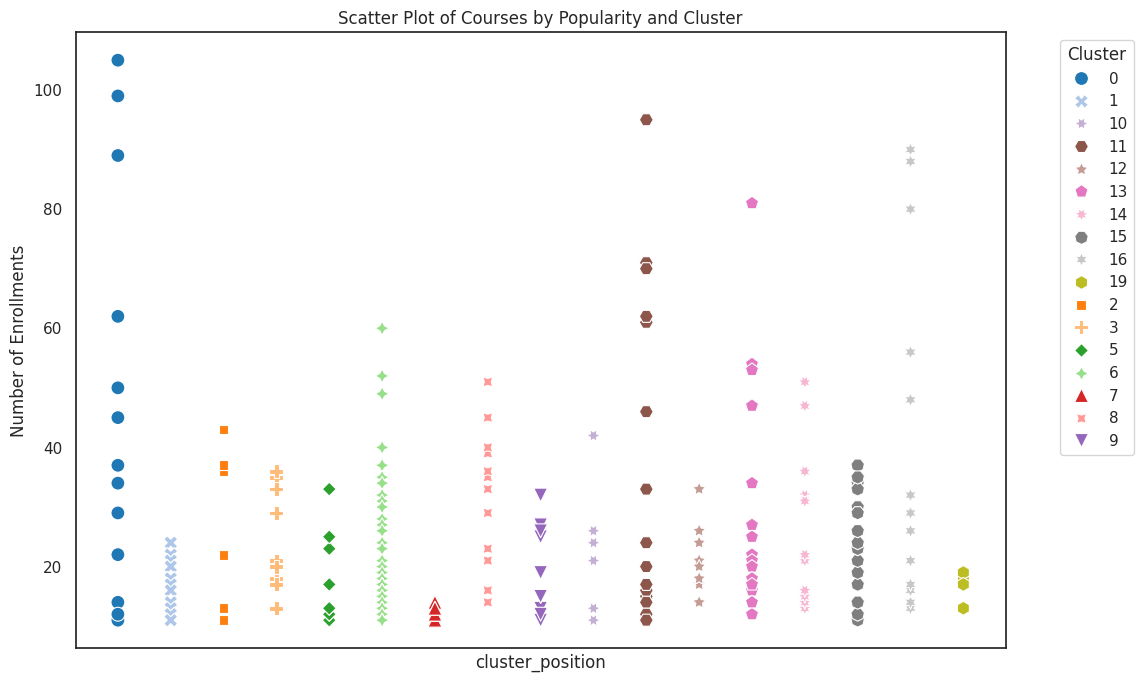

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'popular_courses' has columns 'item' (course name), 'cluster', and 'enrollments'
# Sort the DataFrame by cluster to group courses in the plot
popular_courses_sorted = popular_courses.sort_values(by='cluster')

# Adding a dummy x-value: each cluster gets grouped together
cluster_positions = {cluster: i for i, cluster in enumerate(sorted(popular_courses_sorted['cluster'].unique()))}
popular_courses_sorted['cluster_position'] = popular_courses_sorted['cluster'].map(cluster_positions)

# Plotting with an enhanced color palette
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='cluster_position',
    y='enrollments',
    hue='cluster',
    data=popular_courses_sorted,
    style='cluster',
    palette='tab20',  # A palette with 20 distinct colors
    s=100
)
plt.title('Scatter Plot of Courses by Popularity and Cluster')
plt.ylabel('Number of Enrollments')
plt.xticks([])  # Hide x-axis labels

# Adjust legend to be sorted by cluster
handles, labels = scatter.get_legend_handles_labels()
handles, labels = zip(*sorted(zip(handles, labels), key=lambda t: t[1]))  # Sort by labels which are cluster numbers
plt.legend(handles, labels, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
